### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

Стандартизация

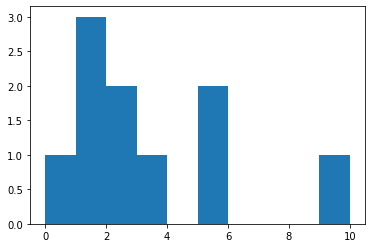

In [9]:
plt.hist(X[1])
plt.show()

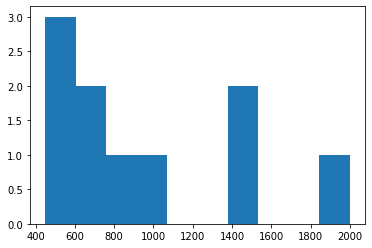

In [10]:
plt.hist(X[2])
plt.show()

In [11]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [12]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

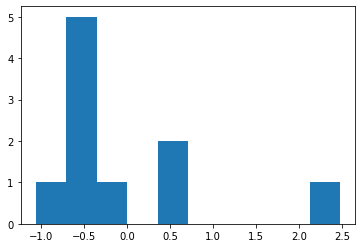

In [13]:
plt.hist(X_st[1])
plt.show()

In [14]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [15]:
from sklearn.preprocessing import StandardScaler
StandardScaler() #Стандартизайия
#sklearn.preprocessing.MinMaxScaler() #Нормализация

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_st[2] = calc_std_fit(X[2])

In [17]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

SGD (Stochastic gradient descent)

In [18]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [20]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.18227586  5.12906932  3.25709194  3.94101629] 82.908489618382
200 [55.52952667  5.47395025  2.56838367  4.36989997] 27.346146648239774
300 [56.37129626  5.69014156  2.00811064  4.7371898 ] 25.88339764199237
400 [56.48293137  5.83812964  1.56017462  5.05431743] 25.541050171740448
500 [56.49773637  5.94321529  1.19991601  5.32264856] 25.32647457436746
600 [56.4996998   6.02029732  0.90894043  5.54680182] 25.18467691415987
700 [56.49996019  6.07839724  0.67323414  5.73251422] 25.090637208594092
800 [56.49999472  6.12314559  0.48191495  5.88555081] 25.028203306715927
900 [56.4999993   6.15818117  0.32641082  6.01121166] 24.9867329697613
1000 [56.49999991  6.1859454   0.19989895  6.11414863] 24.95918117955496


array([56.49999991,  6.1859454 ,  0.19989895,  6.11414863])

In [21]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [22]:
eval_sgd_model(X_st, y, iterations=50000, qty_in_batch=4, alpha=1e-2)

5000 [56.51062031  6.31269102 -0.36443816  6.58449923] 11.289382794451477
10000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289182006618578
15000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
20000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
25000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
30000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
35000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
40000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
45000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403
50000 [56.51062035  6.31272262 -0.3645908   6.58462533] 11.289181999330403


array([56.51062035,  6.31272262, -0.3645908 ,  6.58462533])

L1 регуляризация

L2 регуляризация

In [23]:
# lambda = lambda_/2

Производная:
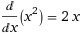

In [24]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, print_=1):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) #производная 2* lambda / 2, двойки сокращаются
        if i % (iterations / 10) == 0:
            if print_>0:
                print(i, W, err, lambda_)
    return W

In [25]:
W2 = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [56.49487895  5.89947315  1.04054601  5.5270874 ] 25.23755832331096 0.0001
1000 [56.49717505  6.19501568  0.13564839  6.17098435] 24.947089650389493 0.0001
1500 [56.49717514  6.26565597 -0.17868956  6.42516923] 24.910200887020064 0.0001
2000 [56.49717514  6.28924463 -0.29120292  6.51776763] 24.905377672807827 0.0001
2500 [56.49717514  6.29763759 -0.33165155  6.55113988] 24.904735047224676 0.0001
3000 [56.49717514  6.30065228 -0.3462019   6.56314895] 24.904645262343745 0.0001
3500 [56.49717514  6.3017366  -0.35143648  6.56746949] 24.904631263168568 0.0001
4000 [56.49717514  6.30212668 -0.35331967  6.56902387] 24.904628595590758 0.0001
4500 [56.49717514  6.30226702 -0.35399717  6.56958307] 24.904627942486606 0.0001
5000 [56.49717514  6.30231751 -0.35424091  6.56978425] 24.904627747206018 0.0001


In [26]:
W2

array([56.49717514,  6.30231751, -0.35424091,  6.56978425])

In [27]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


## Д/з

__Задача:__ Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

__Решение:__<br>
L1 регуляризация <br>
f(x, W) + (lambda_/2) * np.sum(np.abs(W))

Производная:
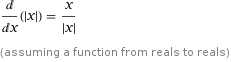

In [38]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ /2 * W/abs(W)) #производная
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [39]:
W1 = eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

In [40]:
W1

array([56.499975  ,  6.30296385, -0.35595354,  6.5711458 ])

In [41]:
eval_model(X_st, y, iterations=5000, alpha=1e-2)

500 [56.49767254  5.83477719  1.36781865  5.25424451] 25.413829625514786
1000 [56.4999999   6.17124081  0.25269258  6.07416416] 24.969784391475397
1500 [56.5         6.2575128  -0.13774522  6.39128671] 24.913059475565493
2000 [56.5         6.28678323 -0.27772011  6.50655795] 24.905712417850083
2500 [56.5         6.29722767 -0.32807425  6.54810646] 24.904760553791704
3000 [56.5         6.30098239 -0.34619733  6.56306445] 24.904637232271696
3500 [56.5         6.30233363 -0.3527205   6.5684486 ] 24.904621254991206
4000 [56.5         6.30281999 -0.35506846  6.57038658] 24.904619185007867
4500 [56.5         6.30299505 -0.35591359  6.57108415] 24.904618916825108
5000 [56.5         6.30305806 -0.35621778  6.57133523] 24.90461888207993


array([56.5       ,  6.30305806, -0.35621778,  6.57133523])

In [42]:
#сравнение
W2, W1, W

(array([56.49717514,  6.30231751, -0.35424091,  6.56978425]),
 array([56.499975  ,  6.30296385, -0.35595354,  6.5711458 ]),
 array([56.5       ,  6.30305806, -0.35621778,  6.57133523]))

__Задача:__ Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). Сделайте вывод<br>
__Решение__:

In [43]:
#зададим список из значений лямбда
lambda_l = [1e-5,
            1e-4, 
            1e-3, 
            1e-2,
            1e-1]
W2_l = []
#рассчитаем веса под каждое из значений списка, используя функцию L2-регуляризации
for lmbd in lambda_l:
    W_t = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_= lmbd, print_=0)
    W2_l.append(W_t)
    print(W_t, lmbd)

[56.4997175   6.3029902  -0.35605002  6.57120483] 1e-05
[56.49717514  6.30231751 -0.35424091  6.56978425] 0.0001
[56.47176412  6.29561264 -0.33623812  6.55564816] 0.001
[56.21890547  6.23067581 -0.16462974  6.42092637] 0.01
[53.80952381  5.73058911  0.98368306  5.51609942] 0.1


__комментарий преподавателя__: Совет небольшой: что бы вручную лямбды не писать, можно было задать их при помощт np.linspace. Так можно было бы посмотреть больше лямбд и заметить, что убывание не совсем линейное

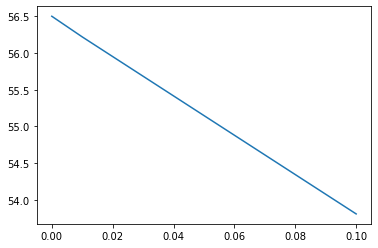

In [44]:
plt.plot(lambda_l, np.array(W2_l)[:,0])


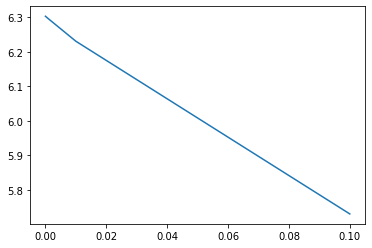

In [45]:
plt.plot(lambda_l, np.array(W2_l)[:,1])

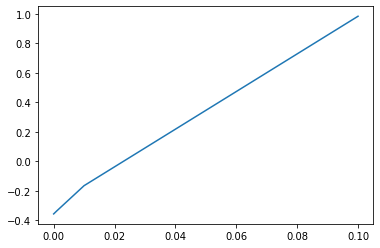

In [46]:
plt.plot(lambda_l, np.array(W2_l)[:,2])

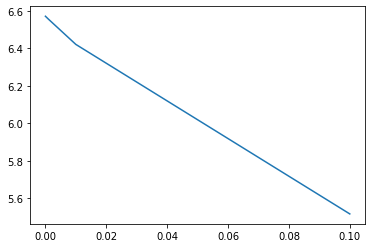

In [47]:
plt.plot(lambda_l, np.array(W2_l)[:,3])

__Вывод:__ с увеличением lambda значения весов уменьшаются по модулю

__Вопрос:__ Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

__Ответ:__ На мой взгляд можно, но это кажется избыточным решением